1
observation_count : 3
Linear Regression Trained Successfully
[-7.01698597]
[0.81610016]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\pc\AppData\Local\Temp\ipykernel_8204\480439090.py", line 421, in train
    if(self.f.get()==0):
AttributeError: 'int' object has no attribute 'get'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\pc\AppData\Local\Temp\ipykernel_8204\480439090.py", line 421, in train
    if(self.f.get()==0):
AttributeError: 'int' object has no attribute 'get'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\pc\AppData\Local\Temp\ipykernel_8204\480439090.py", line 421, in train
    if(self.f.get()==0):
AttributeError: 'int' object has no attri

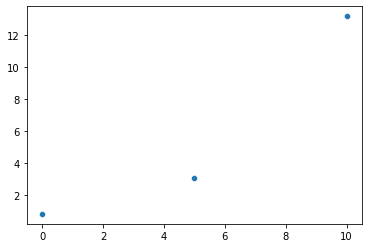

In [1]:
import tkinter as tk
import os
from sklearn.feature_selection import RFE
import pandas as pd
from tkinter import filedialog as fd
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox as mb
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
LARGEFONT =("Verdana", 35)
class tkinterApp(Tk):
    
    
    # __init__ function for class tkinterApp
    def __init__(self, *args, **kwargs):
        
        # __init__ function for class Tk
        Tk.__init__(self, *args, **kwargs)
        
        # creating a container
        container = Frame(self)
        container.pack(side = "top", fill = "both", expand = True)

        container.grid_rowconfigure(0, weight = 1)
        container.grid_columnconfigure(0, weight = 1)

        # initializing frames to an empty array
        self.frames = {}

        # iterating through a tuple consisting
        # of the different page layouts
        for F in (StartPage, Algo, DTC,Train,LR,Rfe,SVM,KNN,Evaluate):

            frame = F(container, self)

            # initializing frame of that object from
            # startpage, page1, page2 respectively with
            # for loop
            self.frames[F] = frame

            frame.grid(row = 0, column = 0, sticky ="nsew")

        self.show_frame(StartPage)

    # to display the current frame passed as
    # parameter
    def show_frame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()
x={}
flags={'data':False,'features':False,'rfe':False}

# first window frame startpage
class StartPage(Frame):
    def __init__(self, parent, controller):        
        Frame.__init__(self, parent)
        self.controller=controller
        lbl0=Label(self, text="Please, Load your problem data", fg='blue', font=("italic", 16),)
        self.btn0=Button(self, text='Load data', width=20,font=("Helvetica", 16),bg="lightblue",)
        btnfe=Button(self, text='Feature Selection', width=20,font=("Helvetica", 16),bg="lightblue",)        
        #lbl1=Label(self, text="Choose problem type", fg='blue', font=("italic", 16),)
        #btn1 =Button(self, text='Classification', width=20,font=("Helvetica", 16),bg="lightblue",command = lambda : controller.show_frame(Page1))
        #btn2=Button(self, text='Clustering', width=20,font=("Helvetica", 16),bg="lightblue",command = lambda : controller.show_frame(Page2))
        # grid
        lbl0.grid(row = 0, column = 1, padx = 10, pady = 10)
        self.btn0.grid(row = 1, column = 1, padx = 10, pady = 10)
        #lbl1.grid(row=2,column= 1,padx=10,pady=10)
        #btn1.grid(row = 3, column = 1, padx = 10, pady = 10)
        #btn2.grid(row = 4, column = 1, padx = 10, pady = 10)
        btnfe.grid(row = 3, column = 1, padx = 10, pady = 10)
        self.btn0.bind('<Button-1>', self.DataPath)
        btnfe.bind('<Button-1>', self.RfeBtn)
        btn1 = Button(self, text ="Continue",)
        btn1.grid(row = 10, column = 6, padx = 10, pady = 10) 
        btn1.bind('<Button-1>', self.CheckData)
    def DataPath(self,event):
            file_Path=fd.askopenfilename() 
            data = pd.read_csv(file_Path)
            #x.append(data)#x[0] x['data']
            x['data']=data
            if(os.path.exists(file_Path)):
                self.btn0['text']="Data has been loaded successfully"
                self.btn0['font']=("Helvetica", 10)
                self.btn0['width']=25
                flags['data']=True
    def CheckData(self,event):
        if(flags['data']!=True): 
            mb.showerror(title = "Error", message = "Please Load your problem data")
        else:
            self.controller.show_frame(Train)
    def RfeBtn(self,event):
        if(flags['data']!=True):
            mb.showerror(title = "Error", message = "Please Load your problem data") 
        else:
            self.controller.show_frame(Train)

class Rfe(Frame):
    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller=controller
        lbl0=Label(self, text="Number of features", fg='blue', font=("italic", 16),)
        self.Features=IntVar()
        num_of_F=Entry(self, textvariable = self.Features, font = ('calibre',10,'normal'))
        lbl0.grid(row = 0, column = 0, padx = 10, pady = 10)
        num_of_F.grid(row = 0, column = 1, padx = 10, pady = 10)
        btn1 = Button(self, text ="Continue",)
        num_of_F.grid(row = 4, column = 4, padx = 10, pady = 10)
        btn1.grid(row = 10, column = 6, padx = 10, pady = 10)        
        btn1.bind('<Button-1>', self.submit)         
    def submit(self,event): 
        if(self.Features.get()<=0):
            mb.showerror(title = "Error", message = "Make Sure you entered valid parameters") 
                
        else:
            self.Features=self.Features.get()
            #x.append(self.Features)
            x['features']=self.Features
            flags['rfe']=True
            self.controller.show_frame(Algo)
            print(x)
# second window frame page1
class Algo(Frame):
    
    def __init__(self, parent, controller):
        
        Frame.__init__(self, parent)
        lbl0=Label(self, text="Choose suitable classification algorizm", fg='blue', font=("italic", 16),)
        btn0=Button(self, text='KNN', width=20,font=("Helvetica", 16),bg="lightblue",command = lambda : controller.show_frame(KNN),)
        btn1=Button(self, text='SVM', width=20,font=("Helvetica", 16),bg="lightblue",command = lambda : controller.show_frame(SVM),)
        btn2=Button(self, text='Decision tree classifier', width=20,font=("Helvetica", 16),bg="lightblue",command = lambda : controller.show_frame(DTC),)
        btn3 = Button(self, text ="StartPage",
                            command = lambda : controller.show_frame(StartPage))
        lbl0.grid(row = 0, column = 4, padx = 10, pady = 10)
        btn0.grid(row = 1, column = 4, padx = 10, pady = 10)
        btn1.grid(row = 2, column = 4, padx = 10, pady = 10)
        btn2.grid(row = 3, column = 4, padx = 10, pady = 10)
        btn3.grid(row = 5, column = 6, padx = 10, pady = 10)

 # third window frame page2
class DTC(Frame): 
    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller=controller
        lbl=Label(self, text="Decision tree classifier", fg='blue', font=("italic", 16),)
        lbl.grid(row = 0, column = 1, padx = 10, pady = 10)
        lbl0=Label(self, text="Decision tree classifier", fg='blue', font=("italic", 16),)
        lbl0.grid(row = 1, column = 1, padx = 10, pady = 10)
        lbl0=Label(self, text="criterion", fg='blue', font=("italic", 16),)
        lbl0.grid(row = 2, column = 0, padx = 10, pady = 10)
        lbl1=Label(self, text="splitter", fg='blue', font=("italic", 16),)
        lbl1.grid(row = 3, column = 0, padx = 10, pady = 10)
        lbl2=Label(self, text="max_depth", fg='blue', font=("italic", 16),)
        lbl2.grid(row = 4, column = 0, padx = 10, pady = 10)
        self.criterion=StringVar()
        self.splitter=StringVar()
        self.max_depth=IntVar()
        bt = Button(self, text ="Train",)
        bt.bind('<Button-1>', self.train) 
                            
        button1 = Button(self, text ="Page 1",
                            command = lambda : controller.show_frame(Algo))
        self.cri_data=('gini', 'entropy', 'log_loss')
        cri_cb=Combobox(self, values= self.cri_data,textvariable=self.criterion)
        cri_cb.grid(row = 2, column = 1, padx = 10, pady = 10)
        self.sp_data=('best', 'random')
        sp_cb=Combobox(self, values= self.sp_data,textvariable=self.splitter)
        sp_cb.grid(row = 3, column = 1, padx = 10, pady = 10)
        mxd_Ent=Entry(self, textvariable =  self.max_depth, font = ('calibre',10,'normal'))
        mxd_Ent.grid(row = 4, column = 1, padx = 10, pady = 10)
        button2 = Button(self, text ="Startpage",
                            command = lambda : controller.show_frame(StartPage))
        bt.grid(row = 7, column = 4, padx = 10, pady = 10) 
    def train(self,event): 
        if(self.criterion.get() not in self.cri_data or self.splitter.get() not in self.sp_data or self.max_depth.get()<=1):
            mb.showerror(title = "Error", message = "Make Sure you entered valid parameters") 
                
        else:

            self.criterion=self.criterion.get()
            self.splitter=self.splitter.get()
            self.max_depth=self.max_depth.get()
            print("criterion : " +self.criterion)
            print("splitter : " +self.splitter)
            print("max_depth : " +str(self.max_depth))
            Data=x['data']
            X=Data.iloc[:, :-1].values
            y=Data.iloc[:, -1].values
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
            DTC=DecisionTreeClassifier(criterion=self.criterion,splitter=self.splitter,max_depth=self.max_depth)
            if(flags['rfe']==True):
                selected_feauter = RFE(DTC, n_features_to_select=x['features'])
                selected_feauter = selected_feauter.fit(X,y)
                y_pred=selected_feauter.predict(X_test)
            else:
                DTC.fit(X_train,y_train)
                y_pred=DTC.predict(X_test)
            x['y_pred']=y_pred
            x['y_test']=y_test
            btn0 = Button(self, text ="Evaluate", command = lambda : self.controller.show_frame(Evaluate)).grid(row = 8, column = 4, padx = 10, pady = 10) 
            print("DTC Trained Successfully")
            print(x['y_pred'])
            print(x['y_test'])
#fourth window
class SVM(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.v = tk.IntVar()
        self.controller=controller
        #self.v.set(1)
        
        label1 = tk.Label(self, text ="SVM", font=("italic", 24),fg="blue", )
        label1.grid(row = 0, column = 2, padx = 10, pady = 10,)
        label2 = tk.Label(self, text ="Kernel", font=("italic", 24),fg="blue", )
        label2.grid(row = 1, column = 0, padx = 10, pady = 10,)      
        label0 = tk.Label(self, text ="Train Done Successfully", font=("italic", 24),fg="blue", )
        label0.grid(row = 0, column = 2, padx = 10, pady = 10,)
        
        button1 = tk.Radiobutton (self, text ="Linear",variable=self.v,value=1 ,fg="blue",font=("italic", 16),)
        button1.grid(row = 1, column = 1, padx = 10, pady = 10,)
        button2 = tk.Radiobutton (self, text ="RBF",variable=self.v,value=2,fg="blue",font=("italic", 16),)
        button2.grid(row = 2, column = 1, padx = 10, pady = 10,)
        button3 = tk.Radiobutton (self, text ="Sigmoid",variable=self.v,value=3,fg="blue",font=("italic", 16),)
        button3.grid(row = 3, column = 1, padx = 10, pady = 10,)
        button4 = tk.Radiobutton (self, text ="Precomputed",variable=self.v,value=4,fg="blue",font=("italic", 16),)
        button4.grid(row = 4, column = 1, padx = 10, pady = 10,)
        button5 = tk.Radiobutton (self, text ="poly",variable=self.v,value=5,fg="blue",font=("italic", 16),)
        button5.grid(row = 5, column = 1, padx = 10, pady = 10,)
        
        btn0 = Button(self, text ="Train",)
        btn0.bind('<Button-1>', self.train)
        btn0.grid(row = 7, column = 6, padx = 10, pady = 10)
        # button5 = tk.Button(self, text ="Test",command=self.test)
        #  button5.grid(row = 7, column = 5, padx = 10, pady = 10)      
        # btn0=tk.Button(self, text="KNN",command= lambda: controller.show_frame(KNN) )
        #  btn0.grid(row = 6, column = 5, padx = 10, pady = 10) 
        self.kernels=('linear','rbf','sigmoid','precomputed' ,'poly')
    def train(self,event): 
        if(self.v.get()==0):
            mb.showerror(title = "Error", message = "Make Sure you entered valid parameters") 
                
        else:
            self.v=self.v.get()
            print(self.v) 
            Data=x['data'] 
            X=Data.iloc[:, :-1].values
            y=Data.iloc[:, -1].values
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
            kernal=self.kernels[self.v-1]
            clf=SVC(kernel=kernal)
            if(flags['rfe']==True):
                selected_feauter = RFE(clf, n_features_to_select=x['features'])
                selected_feauter = selected_feauter.fit(X,y)
                y_pred=selected_feauter.predict(X_test)
            else:
                clf.fit(X_train, y_train)
                y_pred=clf.predict(X_test) 
            x['y_pred']=y_pred
            x['y_test']=y_test 
            btn0 = Button(self, text ="Evaluate", command = lambda : self.controller.show_frame(Evaluate)).grid(row = 8, column = 4, padx = 10, pady = 10) 
  
            print("SVM Trained Successfully")
            print(x['y_pred'])
            print(x['y_test'])       
#fifth  window frame page1
class KNN(tk.Frame):     
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.n_neighbors = tk.IntVar()
        self.controller=controller
        label1 = tk.Label(self, text ="KNN  Enter Parameters", font=("italic", 16),fg="blue", )
        label1.grid(row = 0, column = 1, padx = 10, pady = 10,)
        label2 = tk.Label(self, text ="n_neigbors", font=("italic", 16),fg="blue", )
        label2.grid(row = 1, column = 0, padx = 10, pady = 10,)      
        n_entry= tk.Entry(self, text ="Submit",textvariable=self.n_neighbors )
        n_entry.grid(row = 1, column = 1, padx = 10, pady = 10)    
        btn0 = Button(self, text ="Train",)
        btn0.bind('<Button-1>', self.train)
        btn0.grid(row = 8, column = 6, padx = 10, pady = 10)     
    def train(self,event): 
        if(self.n_neighbors.get()<0):
            mb.showerror(title = "Error", message = "Make Sure you entered valid k less or equal "+str(x['features'])) 
                
        else:
            self.n_neighbors=self.n_neighbors.get()
            print(self.n_neighbors)
            Data=x['data'] 
            X=Data.iloc[:, :-1].values
            y=Data.iloc[:, -1].values
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
            KNN=KNeighborsClassifier(n_neighbors=self.n_neighbors)

            if(flags['rfe']==True):

                selected_feauter = RFE(KNN, n_features_to_select=x['features'])
                selected_feauter = selected_feauter.fit(X,y)
                y_pred=selected_feauter.predict(X_test)
            else:
                KNN.fit(X_train,y_train)
                y_pred=KNN.predict(X_test) 
            x['y_pred']=y_pred
            x['y_test']=y_test 
            btn0 = Button(self, text ="Evaluate", command = lambda : self.controller.show_frame(Evaluate)).grid(row = 8, column = 4, padx = 10, pady = 10) 
  
            print("KNN Trained Successfully")
            print(x['y_pred'])
            print(x['y_test'])      
class Evaluate (tk.Frame): 
    def __init__(self, parent, controller):    
        tk.Frame.__init__(self, parent)  
      
        
        button1 = tk.Button(self, text ="Accuracy") 
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)  
        button1.bind('<Button-1>',self.acc)
        button2 = tk.Button(self, text ="Precision") 
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)  
        button2.bind('<Button-1>',self.precision)
        button3 = tk.Button(self, text ="Recall") 
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)  
        button3.bind('<Button-1>',self.recall)
        button4 = tk.Button(self, text ="F1_Score") 
        button4.grid(row = 4, column = 1, padx = 10, pady = 10)  
        button4.bind('<Button-1>',self.f1_score)
        button5= tk.Button(self, text ="Confusion_Matrix") 
        button5.grid(row = 5, column = 1, padx = 10, pady = 10)  
        button5.bind('<Button-1>',self.Confusion_Matrix)
        button6 = Button(self, text ="Startpage", 
          command = lambda : controller.show_frame(StartPage)).grid(row = 6, column = 4, padx = 10, pady = 10) 

        
    def acc(self, event):
        y_test=x['y_test']
        y_pred=x['y_pred']
        acc=metrics.accuracy_score(y_test,y_pred)
        label1 = tk.Label(self, text =acc, font=("italic", 16),fg="blue", ) 
        label1.grid(row = 1, column = 2, padx = 10, pady = 10,) 
        print(acc)
            
            
    def precision(self,event):
        y_test=x['y_test']
        y_pred=x['y_pred']
        precision= metrics.precision_score(y_test, y_pred)
        label2 = tk.Label(self, text =precision, font=("italic", 16),fg="blue", ) 
        label2.grid(row = 2, column = 2, padx = 10, pady = 10,) 
        print(precision)
        
        
    def recall(self,event):
        y_test=x['y_test']
        y_pred=x['y_pred']
        recall=metrics.recall_score(y_test, y_pred)
        label3 = tk.Label(self, text =recall, font=("italic", 16),fg="blue", ) 
        label3.grid(row = 3, column = 2, padx = 10, pady = 10,)
        print(recall)
    
    def f1_score(self,event):
        y_test=x['y_test']
        y_pred=x['y_pred']
        f1_score= metrics.f1_score(y_test, y_pred)
        label4 = tk.Label(self, text =f1_score, font=("italic", 16),fg="blue", ) 
        label4.grid(row = 4, column = 2, padx = 10, pady = 10,)
        print(f1_score)
        
    def Confusion_Matrix (self, event):
        y_test=x['y_test']
        y_pred=x['y_pred']
        cm= metrics.confusion_matrix(y_test, y_pred)
        label5 = tk.Label(self, text =cm, font=("italic", 16),fg="blue", ) 
        label5.grid(row = 5, column =2, padx = 10, pady = 10,)
        print(confusion_matrix)
#linear Regression
class Train(tk.Frame):
    def __init__(self, parent, controller):    
        tk.Frame.__init__(self, parent)
        lbl0=Label(self, text="Choose problem type", fg='blue', font=("italic", 16))
        btn0=Button(self, text='Linear Regression', width=20,font=("Helvetica", 16),bg="lightblue",
                command = lambda : controller.show_frame(LR))
        btn1=Button(self, text='Classification', width=20,font=("Helvetica", 16),bg="lightblue",
                    command = lambda : controller.show_frame(Algo))
        lbl0.grid(row = 0, column = 4, padx = 10, pady = 10)
        btn0.grid(row = 1, column = 4, padx = 10, pady = 10)
        btn1.grid(row = 2, column = 4, padx = 10, pady = 10)
class LR(tk.Frame):
    def __init__(self, parent, controller):    
        tk.Frame.__init__(self, parent) 
        self.f = tk.IntVar()
        #self.controller=controller
        label1 = tk.Label(self, text ="Linear Regression", font=("italic", 16),fg="blue", )
        label1.grid(row = 0, column = 1, padx = 10, pady = 10,)
        label2 = tk.Label(self, text ="fit_intercept", font=("italic", 16),fg="blue", )
        label2.grid(row = 1, column = 0, padx = 10, pady = 10,)
        button1 = tk.Radiobutton (self, text ="True",variable=self.f,value=1 ,fg="blue",font=("italic", 16),)
        button1.grid(row = 1, column = 1, padx = 10, pady = 10,)
        button2 = tk.Radiobutton (self, text ="False",variable=self.f,value=2,fg="blue",font=("italic", 16),)
        button2.grid(row = 2, column = 1, padx = 10, pady = 10,)
        self.fit_intercept=(True,False)
        lbl2=Label(self, text="observation_count", fg='blue', font=("italic", 16),)
        lbl2.grid(row = 4, column = 0, padx = 10, pady = 10)
        self.observation_count=IntVar()
        obs_Ent=Entry(self, textvariable =self.observation_count, font = ('calibre',10,'normal'))
        obs_Ent.grid(row = 4, column = 1, padx = 10, pady = 10)
        btn0 = Button(self, text ="Train",)
        btn0.bind('<Button-1>', self.train)
        btn0.grid(row = 8, column = 6, padx = 10, pady = 10)
    def train(self,event): 
        if(self.f.get()==0):
            mb.showerror(title = "Error", message = "Make Sure you entered valid parameters")
        else:
            self.f=self.f.get()
            print(self.f) 
            self.observation_count=self.observation_count.get()
            print("observation_count : " +str(self.observation_count))
            Data=x['data'] 
            X=Data.iloc[:, :-1].values
            y=Data.iloc[:, -1].values 
            x_var=np.linspace(start=0,stop=10,num=self.observation_count)
            np.random.seed(22)
            y_var=x_var+np.random.normal(size=self.observation_count,loc=1,scale=2)
            sns.scatterplot(x=x_var,y=y_var)
            X_train, X_test, y_train, y_test = train_test_split(x_var.reshape(-1,1),y_var, test_size=0.3,random_state=42)
            self.fit_intercept=self.fit_intercept[self.f-1]
            linear_regress=LinearRegression(fit_intercept=self.fit_intercept )
            if(flags['rfe']==True):
                selected_feauter = RFE(linear_regress, n_features_to_select=x['features'])
                selected_feauter = selected_feauter.fit(X,y)
                y_pred=selected_feauter.predict(X_test)
            else:
                linear_regress.fit(X_train,y_train)
                y_pred=linear_regress.predict(X_test)
                rmse=mean_squared_error(y_pred,y_test)
            x['y_pred']=y_pred
            x['y_test']=y_test 
#   btn0 = Button(self, text ="Evaluate", command = lambda : self.controller.show_frame(Evaluate)).grid(row = 8, column = 4, padx = 10, pady = 10) 
            print("Linear Regression Trained Successfully")
            print(x['y_pred'])
            print(x['y_test'])
# Driver Code
app = tkinterApp()
app.title('ML Project')
app.mainloop()
